<a href="https://colab.research.google.com/github/alexjercan/mesh-pose-reconstruction/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/alexjercan/mesh-pose-reconstruction.git
%cd mesh-pose-reconstruction

import torch
from IPython.display import clear_output

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [2]:
# Download bdataset_tiny
torch.hub.download_url_to_file('https://github.com/alexjercan/mesh-pose-reconstruction/releases/download/v1.0/bdataset_tiny.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

In [4]:
import config
from util.common import L_RGB, L_DEPTH, L_NORMAL

config.DATASET = 'bdataset_tiny'
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
config.NUM_WORKERS = 4
config.BATCH_SIZE = 4
config.IMAGE_SIZE = 224
config.MAP_SIZE = 32
config.ENCODER_LEARNING_RATE = 1e-3
config.DECODER_LEARNING_RATE = 1e-3
config.ENCODER_LR_MILESTONES = [150]
config.DECODER_LR_MILESTONES = [150]
config.BETAS = (.9, .999)
config.GAMMA = .5
config.WEIGHT_DECAY = 1e-4
config.NUM_EPOCHS = 300
config.VOXEL_THRESH = [.2, .3, .4, .5]
config.MAP_IOU_THRESH = 0.5
config.NMS_IOU_THRESH = 0.45
config.PIN_MEMORY = True
config.LOAD_MODEL = False
config.SAVE_MODEL = False
config.AUGMENT = False
config.TEST = True
config.PLOT = False
config.OUT_PATH = "./"
config.CHECKPOINT_FILE = "checkpoint.pth"
config.IMG_DIR = "../" + config.DATASET + "/images/"
config.MESH_DIR = "../" + config.DATASET + "/labels/"
config.USED_LAYERS = [L_RGB, L_DEPTH, L_NORMAL]

In [5]:
from train import train
train()

100%|██████████| 33/33 [00:02<00:00, 11.12it/s, iou=['0.2168', '0.1993', '0.1925', '0.1880'], loss=0.854]


In [6]:
torch.hub.download_url_to_file('https://github.com/alexjercan/mesh-pose-reconstruction/releases/download/v1.0/tiny.pth', 'tiny.pth')

In [7]:
import config

config.LOAD_MODEL = True
config.CHECKPOINT_FILE = "tiny.pth"
config.PLOT = True

  0%|          | 0/33 [00:00<?, ?it/s, iou=['0.6293', '0.6227', '0.6151', '0.6101'], loss=0.15]

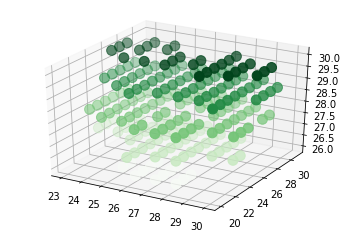

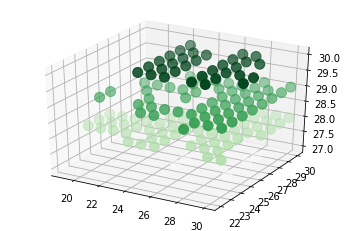

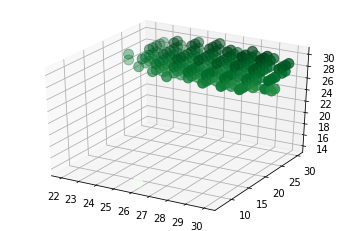

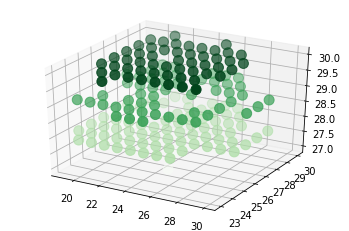

100%|██████████| 33/33 [00:03<00:00,  9.14it/s, iou=['0.2168', '0.1993', '0.1925', '0.1880'], loss=0.854]


In [8]:
from test import test
test()